#imports , dependencies , dataset and small preprocessing

In [ ]:
from google.colab import output
!wget https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
output.clear()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.basemap import Basemap
from sklearn.cluster import KMeans

%matplotlib inline
base_color=sns.color_palette()[0]


In [ ]:

data=pd.read_csv("/content/201902-fordgobike-tripdata.csv")
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [ ]:
data.info() ## to much nulls 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [ ]:
data.dropna(inplace=True)# removing the nulls 
data.reset_index(drop=True, inplace=True)


In [ ]:
#transfer the start and end time to datetime type
data.start_time = pd.to_datetime(data.start_time) 
data.end_time = pd.to_datetime(data.end_time)
# extracting each part alone
data['start_date'] = data.start_time.dt.strftime('%Y-%m-%d')
data['start_hour_day'] = data.start_time.dt.strftime('%H')
data['end_hour_day'] = data.end_time.dt.strftime('%H')
data['start_day_week'] = data.start_time.dt.strftime('%A')
data['start_month'] =  data.start_time.dt.strftime('%B')
data['year'] = data.start_time.dt.strftime('%Y')


In [ ]:
R = 6373.0

# we can generate the distance of each ride using the longtitide and latitde using haversine formula 
# for more details google it 
lat1 = np.radians(data.start_station_latitude)
lon1 = np.radians(data.start_station_longitude)
lat2 = np.radians(data.end_station_latitude)
lon2 = np.radians(data.end_station_longitude)

dlon = lon2 - lon1

dlat = lat2 - lat1

a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2      #Haversine formula
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
distance = R * c
data["distance"]=distance

# Data Exploration outline

    1 - Univariate 

      1 -Geographical
          Analysis of Longtitide and latitdue 
          generation of areas ids 
      2 - user type histogram (countplot)
      3 - member gender histogram (countplot)
      4 - member birth year distribution 
          remove illogical years
      5 - bike share 
      6 - distance 
          getting the cyclist who take round and come back to first place again
          explore the membership of the turn around cyclists 
      7 - duration 
      During this process I've Removed a lot of outliers
    2 - Bivariate 
      removing unused columns 
      1 - duration vs gender (box plot & violin plot)
      2 - member birth year vs duration (hear map)
      3 - user type vs duration (box plot & violin plot)
      4 - user type vs duration (box plot & violin plot) *for turnaround cyclists*
      5 - duration distance  (heatmap and scatter plot(regplot) )
      8 - user type - member birth year (faceting histogram)
      6 - user type  - gender (faceting histogram )
      7 - bike share - gender (faceting histogram )
      9 - duration - bike share (box plot and violin plot)
    3 - Multivariate 
      1

## Univariate 
      1 -Geographical
          Analysis of Longtitide and latitdue 
          generation of areas ids 
      2 - user type histogram (countplot)
      3 - member gender histogram (countplot)
      4 - member birth year distribution 
          remove illogical years
      5 - bike share 
      6 - distance 
          getting the cyclist who take round and come back to first place again
          explore the membership of the turn around cyclists 
      7 - duration 
      During this process I've Removed a lot of outliers

### Geographical

#### check if there is a conflict in the data 

###### check that the given ids refere to only one name,one latitude , one longitdue for start and end points

In [ ]:
start_ids=data.start_station_id.unique()
end_ids=data.end_station_id.unique()
print("for start stations")
for id in start_ids:
  if data[data.start_station_id==id].start_station_name.nunique() >1:
    print("staion id number",id ,"has more than one unique name")
print("--------------"*4)
for id in start_ids:
  if data[data.start_station_id==id].start_station_latitude.nunique() >1:
    print("staion id number",id ,"has more than one unique latitude")
print("--------------"*4)
for id in start_ids:
  if data[data.start_station_id==id].start_station_longitude.nunique() >1:
    print("staion id number",id ,"has more than one unique longitude")
print("for end stations")

for id in end_ids:
  if data[data.end_station_id==id].end_station_name.nunique() >1:
    print("staion id number",id ,"has more than one unique name")
print("--------------"*4)
for id in end_ids:
  if data[data.end_station_id==id].end_station_latitude.nunique() >1:
    print("staion id number",id ,"has more than one unique latitude")
print("--------------"*4)
for id in end_ids:
  if data[data.end_station_id==id].end_station_longitude.nunique() >1:
    print("staion id number",id ,"has more than one unique longitude")


for start stations
--------------------------------------------------------
--------------------------------------------------------
for end stations
--------------------------------------------------------
--------------------------------------------------------


###### getting a dictionary 

In [ ]:
start_id2location={} # start points dic from ids to (lonfitude ,latitdue)
end_id2location={} # end points dic from ids to (lonfitude ,latitdue)
for id in start_ids:
  station_longitude=data[data.start_station_id==id].start_station_longitude.unique()[0]
  station_latitude=data[data.start_station_id==id].start_station_latitude.unique()[0]
  start_id2location[id]=np.array([station_longitude,station_latitude])
for id in end_ids:
  station_longitude=data[data.end_station_id==id].end_station_longitude.unique()[0]
  station_latitude=data[data.end_station_id==id].end_station_latitude.unique()[0]
  end_id2location[id]=np.array([station_longitude,station_latitude])

#### visualization 
I was checking that they have the same visualization 

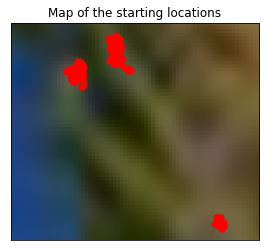

In [ ]:

llcrnrlon=-122.4
urcrnrlon=-121.9

llcrnrlat=37.2
urcrnrlat=37.9
plt.title("Map of the starting locations")
m = Basemap(projection='lcc', resolution=None, lat_0=37.6 ,lon_0=-122.2,width=8E4, height=7E4 )
m.bluemarble(scale=6.5)
for id in start_ids:
  # Map (long, lat) to (x, y) for plotting
  long_index=0
  lat_index=1
  x, y = m(start_id2location[id][long_index], start_id2location[id][lat_index])
  plt.plot(x, y, 'ok', markersize=5,color="red")
  # plt.text(x, y, id, fontsize=1);

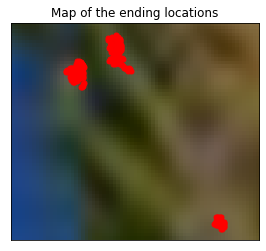

In [ ]:
m = Basemap(projection='lcc', resolution=None, lat_0=37.6 ,lon_0=-122.2,width=8E4, height=7E4 )
m.bluemarble(scale=6.5)
plt.title("Map of the ending locations")

for id in end_ids:
  long_index=0
  lat_index=1
  x, y = m(end_id2location[id][long_index], end_id2location[id][lat_index])
  plt.plot(x, y, 'ok', markersize=5,color="red")


#### clustring 
I noticed that there is obviously three completly separeted clusters so I clusterd them using k means 

In [ ]:
X=np.zeros((329,2))
for i in range(329):
  X[i]=end_id2location[end_ids[i]]
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
id2label={}
for i in range(end_ids.shape[0]):
  id2label[end_ids[i]]=kmeans.labels_[i]
colors=[]

colors.append("red")
colors.append("blue")
colors.append("green")

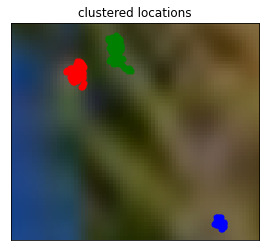

In [ ]:
m = Basemap(projection='lcc', resolution=None, lat_0=37.6 ,lon_0=-122.2,width=8E4, height=7E4 )
m.bluemarble(scale=6.5)
plt.title("clustered locations")
for i,id in enumerate(end_ids):
  long_index=0
  lat_index=1
  x, y = m(end_id2location[id][long_index], end_id2location[id][lat_index])
  plt.plot(x, y, 'ok', markersize=5,color=colors[id2label[id]])

In [ ]:
del m  # around 7 giga and will not used again 

In [ ]:
from_area_to_another=[]
for i in range(data.shape[0]):
  row=data.iloc[i].values
  if id2label[row[3]] !=id2label[row[7]]:
    from_area_to_another.append(i)


from_area_to_another # too little could be removed easily 

[19102, 48625, 81664, 83552, 85587, 106913, 116016, 146071, 154358]

In [ ]:
data.drop(from_area_to_another,axis=0,inplace=True)

In [ ]:
data["area"]=data.start_station_id.map(id2label)
data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start_hour_day,end_hour_day,start_day_week,start_month,year,distance,area
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,2019-02-28,17,08,Thursday,February,2019,0.544879,0
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,2019-02-28,12,05,Thursday,February,2019,2.705394,0
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,2019-02-28,17,04,Thursday,February,2019,0.260820,0
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,2019-02-28,23,00,Thursday,February,2019,2.410058,2
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,2019-02-28,23,00,Thursday,February,2019,3.333249,0


### user type 

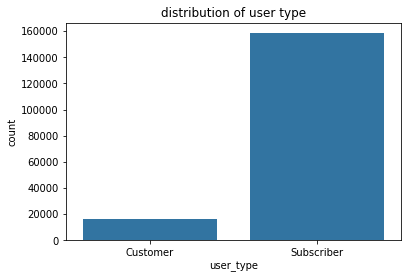

In [ ]:
sns.countplot(data=data, x='user_type',color=base_color);
plt.title("distribution of user type");

### member gender

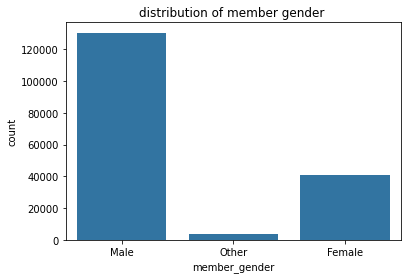

In [ ]:
sns.countplot(data=data, x='member_gender',color=base_color);
plt.title("distribution of member gender ");

### member birthyear 

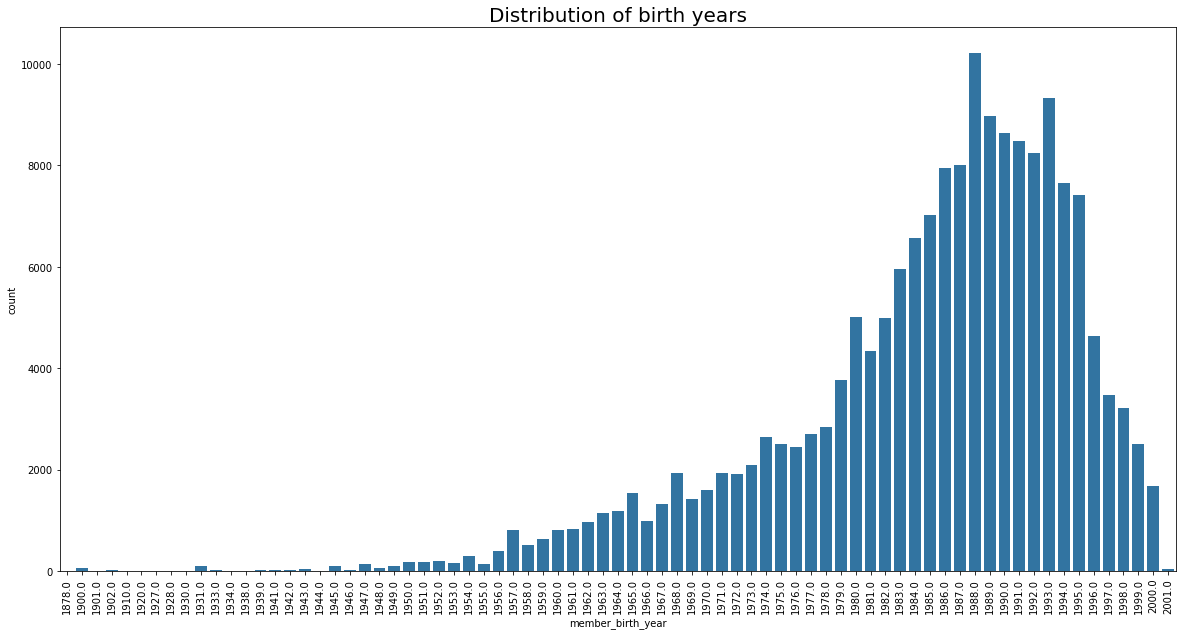

In [ ]:
plt.figure(figsize=[20,10])
sns.countplot(data=data, x='member_birth_year',color=base_color);
plt.xticks(rotation=90)
plt.title("Distribution of birth years",fontsize=20);

In [ ]:
np.mean(data.member_birth_year) 

1984.8031701754285

In [ ]:
data_clean=data.copy()

{'boxes': [<matplotlib.lines.Line2D at 0x7f6f1d6b4588>],
 'caps': [<matplotlib.lines.Line2D at 0x7f6f1d6b4f98>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f6f1d602a58>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f6f1d6026d8>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f6f1d6b4898>,
  <matplotlib.lines.Line2D at 0x7f6f1d6b4c18>]}

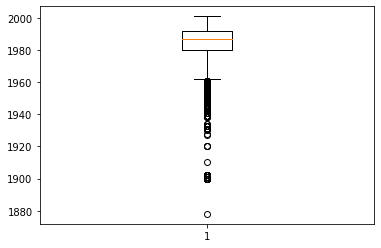

In [ ]:
plt.boxplot(data=data,x="member_birth_year")# I noticed this in the bivariate then i added to the univariate 

so weird there is some of ages before 1990 that's too old

we can use the IQR 

IQR=1992-1980=12
min=1980-12*1.5=1962


In [ ]:
data_clean=data_clean[data_clean.member_birth_year>1962]

### bike share

Text(0.5, 1.0, 'Distribution of bike share ')

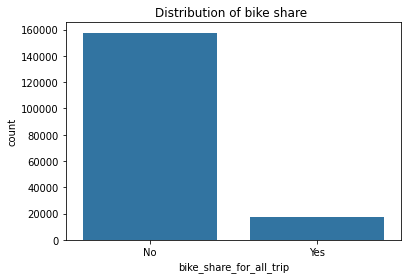

In [ ]:
sns.countplot(data=data, x='bike_share_for_all_trip',color=base_color);
plt.title("Distribution of bike share ")

### distance 

In [ ]:
data_clean.distance.describe()

count    168207.000000
mean          1.691154
std           1.078212
min           0.000000
25%           0.916831
50%           1.432922
75%           2.222927
max           9.932128
Name: distance, dtype: float64

Text(0, 0.5, 'count')

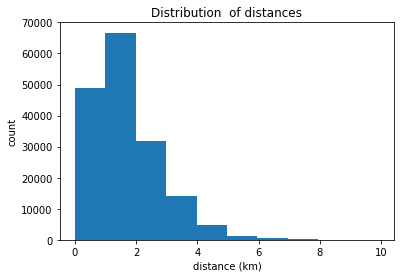

In [ ]:
# data.distance
plt.hist(data = data_clean, x = 'distance');
plt.title("Distribution  of distances")
plt.xlabel('distance (km)')
plt.ylabel('count')

Text(0, 0.5, 'count')

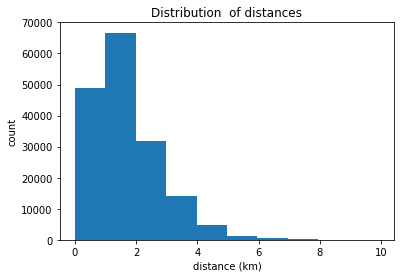

In [ ]:
data_clean=data_clean[data_clean.distance<10]
plt.hist(data = data_clean, x = 'distance');
plt.title("Distribution  of distances")
plt.xlabel('distance (km)')
plt.ylabel('count')

Text(0, 0.5, 'count')

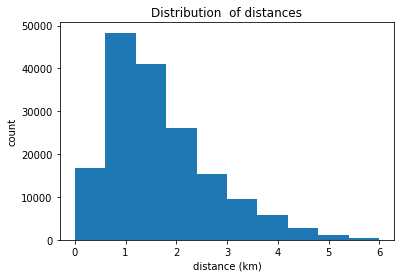

In [ ]:
data_clean=data_clean[data_clean.distance<6]
plt.hist(data = data_clean, x = 'distance');
plt.title("Distribution  of distances")
plt.xlabel('distance (km)')
plt.ylabel('count')

#### turnaround cyclists

In [ ]:
turnaround_cycle=data_clean[data_clean.distance==0] #these just took a circle 
turnaround_cycle[turnaround_cycle.duration_sec==0].shape

(0, 24)

In [ ]:
np.unique(turnaround_cycle.user_type,return_counts=True)

(array(['Customer', 'Subscriber'], dtype=object), array([ 857, 2394]))

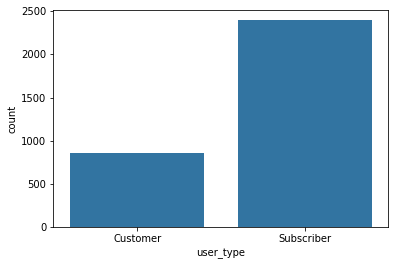

In [ ]:
sns.countplot(data=turnaround_cycle, x='user_type',color=base_color);


In [ ]:
data_clean=data_clean[data_clean.distance!=0]

### duration

Text(0, 0.5, 'count')

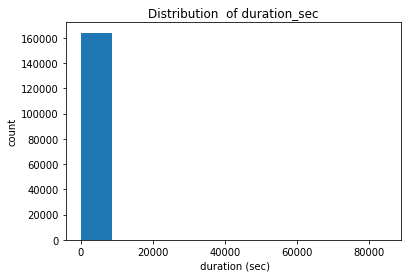

In [ ]:
# bins=np.arange(50,87500,100)
plt.hist(data = data_clean, x = 'duration_sec');
# so there is an outlier at the right 
plt.title("Distribution  of duration_sec")
plt.xlabel(' duration (sec)')
plt.ylabel('count')

**outliers**

Text(0, 0.5, 'count')

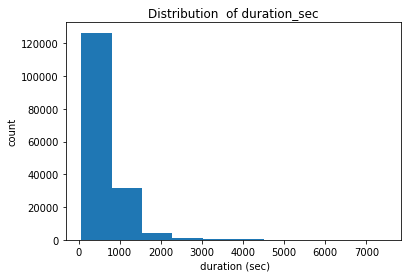

In [ ]:
data_clean=data_clean[data_clean.duration_sec<7500]
plt.hist(data = data_clean, x = 'duration_sec');
plt.title("Distribution  of duration_sec")
plt.xlabel(' duration (sec)')
plt.ylabel('count')

**still outliers**

In [ ]:
data_clean.duration_sec.describe()

count    163898.000000
mean        619.699160
std         500.354403
min          61.000000
25%         322.000000
50%         504.000000
75%         769.000000
max        7467.000000
Name: duration_sec, dtype: float64

In [ ]:
data_clean=data_clean[data_clean.duration_sec<3000]

Text(0, 0.5, 'count')

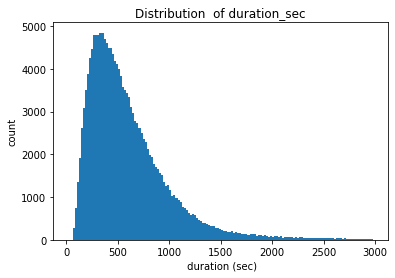

In [ ]:
bins=np.arange(20,3000,20)
plt.hist(data = data_clean, x = 'duration_sec',bins=bins);
plt.title("Distribution  of duration_sec")
plt.xlabel(' duration (sec)')
plt.ylabel('count')


Text(0, 0.5, 'count')

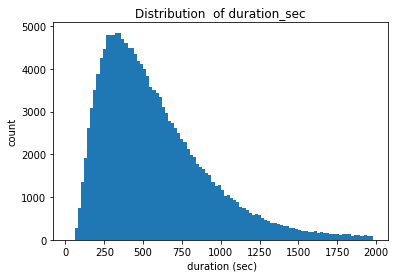

In [ ]:
data_clean=data_clean[data_clean.duration_sec<2000]
bins=np.arange(20,2000,20)
plt.hist(data = data_clean, x = 'duration_sec',bins=bins);
plt.title("Distribution  of duration_sec")
plt.xlabel(' duration (sec)')
plt.ylabel('count')


## Bivariate 

   removing unused columns 
   
      1 - duration vs gender (box plot & violin plot)
      2 - member birth year vs duration (hear map)
      3 - user type vs duration (box plot & violin plot)
      4 - user type vs duration (box plot & violin plot) *for turnaround cyclists*
      5 - duration distance  (heatmap and scatter plot(regplot) )
      8 - user type - member birth year (faceting histogram)
      6 - user type  - gender (faceting histogram )
      7 - bike share - gender (faceting histogram )
      9 - duration - bike share (box plot and violin plot)


removing unused columns

In [ ]:
unused_columns=["start_time","end_time","start_station_id","start_station_name","start_station_latitude",
                "start_station_longitude","end_station_id","end_station_name","end_station_latitude","end_station_longitude"]
data_2=data_clean.drop(unused_columns,axis=1)
data_2.head()

,duration_sec,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start_hour_day,end_hour_day,start_day_week,start_month,year,distance,area
3,1585,4898,Subscriber,1974.0,Male,Yes,2019-02-28,23,00,Thursday,February,2019,2.410058,2
5,1147,3803,Subscriber,1983.0,Female,No,2019-02-28,23,00,Thursday,February,2019,2.029188,1
6,1615,6329,Subscriber,1989.0,Male,No,2019-02-28,23,00,Thursday,February,2019,4.533991,0
7,1570,6548,Subscriber,1988.0,Other,No,2019-02-28,23,00,Thursday,February,2019,4.533991,0
8,1049,6488,Subscriber,1992.0,Male,No,2019-02-28,23,00,Thursday,February,2019,3.665251,0


 ### duration vs gender (box plot & violin plot)



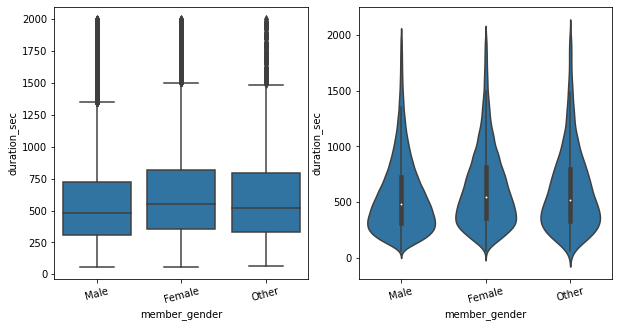

In [ ]:
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sns.boxplot(data=data_2, x='member_gender', y='duration_sec', color=base_color)
plt.xticks(rotation=15);
plt.subplot(1,2,2)
ax1 = sns.violinplot(data=data_2, x='member_gender', y='duration_sec', color=base_color, innner='quartile')
plt.xticks(rotation=15);
# plt.ylim(ax1.get_ylim()) # set y-axis limits to be same as left plot

  
### member birth year vs duration (heat map)
     

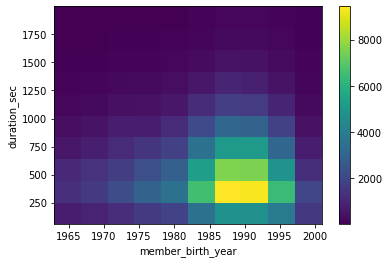

In [ ]:
plt.hist2d(data=data_2, x='member_birth_year', y='duration_sec',cmin=0.5) #I didn't notice that before but i think we need to remove some of these birthdates
# sns.boxplot()

plt.colorbar()
plt.xlabel('member_birth_year')
plt.ylabel('duration_sec');



### user type vs duration (box plot & violin plot)
 

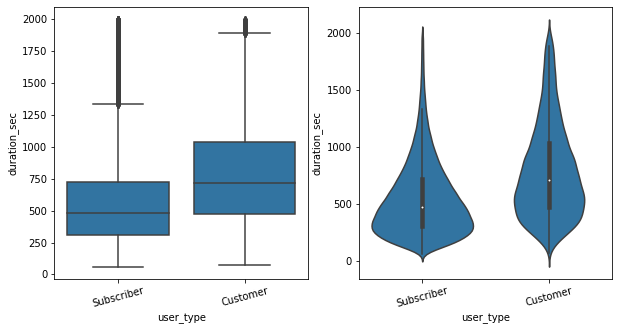

In [ ]:
base_color=sns.color_palette()[0]
plt.figure(figsize=[10,5])
plt.subplot(1,2,1)
sns.boxplot(data=data_2, x='user_type', y='duration_sec', color=base_color)
plt.xticks(rotation=15);
plt.subplot(1,2,2)
ax1 = sns.violinplot(data=data_2, x='user_type', y='duration_sec', color=base_color, innner='quartile')
plt.xticks(rotation=15);

### user type vs duration (box plot & violin plot) *for turnaround cyclists*


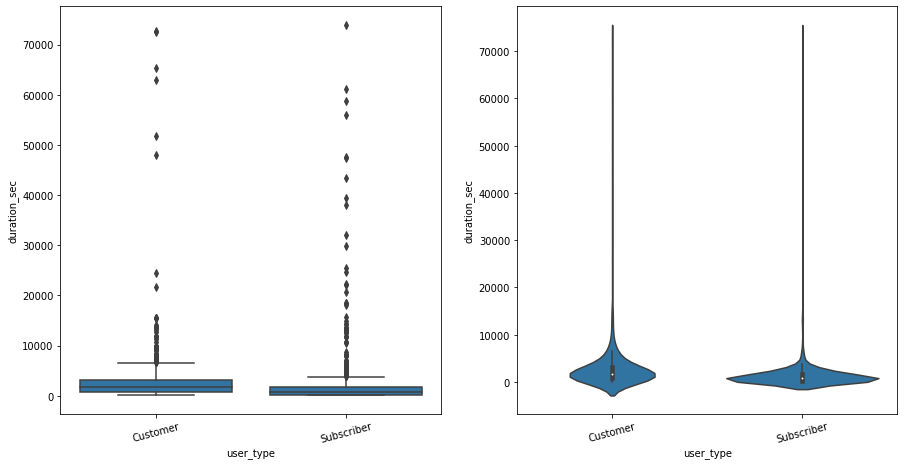

In [ ]:
# turnaround_cycle
base_color=sns.color_palette()[0]
plt.figure(figsize=[15,7.5])
plt.subplot(1,2,1)
sns.boxplot(data=turnaround_cycle, x='user_type', y='duration_sec', color=base_color)
plt.xticks(rotation=15);
plt.subplot(1,2,2)
ax1 = sns.violinplot(data=turnaround_cycle, x='user_type', y='duration_sec', color=base_color, innner='quartile')
plt.xticks(rotation=15);

### duration distance  (heatmap and scatter plot(regplot) )


Text(0, 0.5, 'distance')

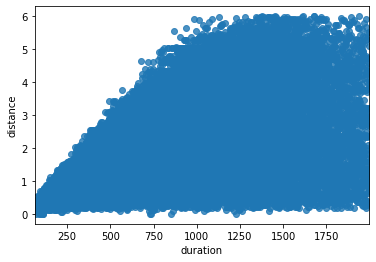

In [ ]:
sns.regplot(data = data_2, x = 'duration_sec', y = 'distance');
plt.xlabel('duration') 
plt.ylabel('distance')

Text(0, 0.5, 'distance')

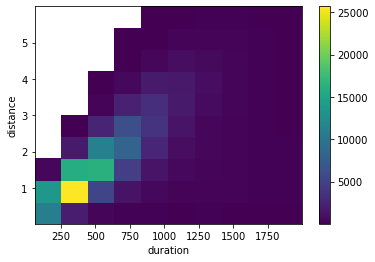

In [ ]:
plt.hist2d(data=data_2,  x = 'duration_sec', y = 'distance',cmin=0.5) #positive strong corelation
# sns.boxplot()

plt.colorbar()
plt.xlabel('duration') 
plt.ylabel('distance')

  ### user type  - gender (faceting histogram )





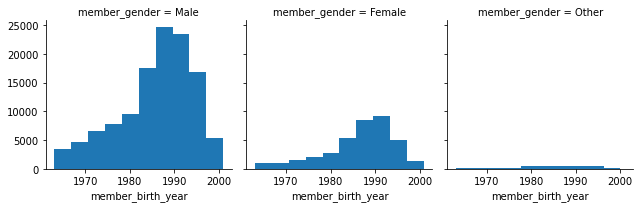

In [ ]:
g = sns.FacetGrid(data = data_2, col = 'member_gender')
g.map(plt.hist, "member_birth_year")

### bike share - gender (faceting histogram )


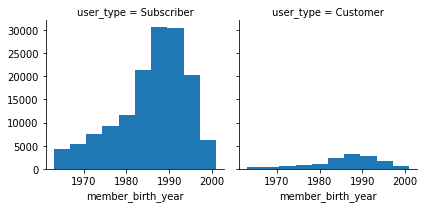

In [ ]:
g = sns.FacetGrid(data = data_2, col = 'user_type')
g.map(plt.hist, "member_birth_year")

### user type - member birth year (faceting histogram)


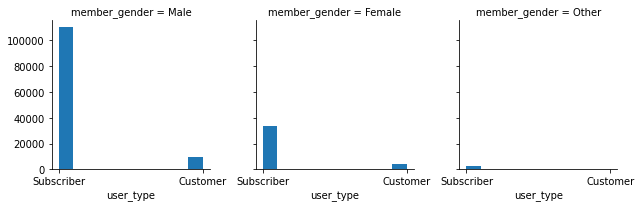

In [ ]:
g = sns.FacetGrid(data = data_2, col = 'member_gender')
g.map(plt.hist, "user_type")

### duration - bike share (box plot and violin plot

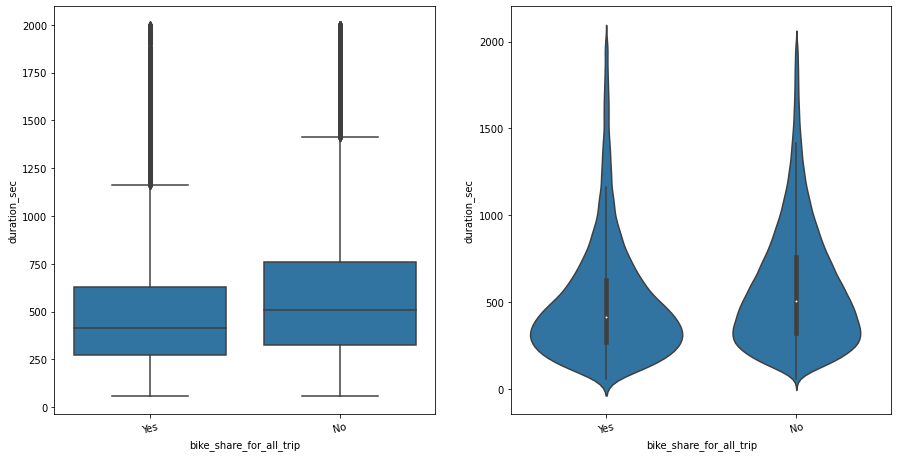

In [ ]:
plt.figure(figsize=[15,7.5])
plt.subplot(1,2,1)
sns.boxplot(data=data_2, x='bike_share_for_all_trip', y='duration_sec', color=base_color)
plt.xticks(rotation=15);
plt.subplot(1,2,2)
ax1 = sns.violinplot(data=data_2, x='bike_share_for_all_trip', y='duration_sec', color=base_color, innner='quartile')
plt.xticks(rotation=15);

you can notice the difference between the last two graphs and the turnaround graohs that's because the data is more clean 

## multivariate 

we can analys the 
time(hour_day,year, month) - duration and different categorical variable(gender,birthyear , areas)

#### remove unused columns 

In [ ]:
unused_columns=["start_time","end_time","start_station_id","start_station_name","start_station_latitude",
                "start_station_longitude","end_station_id","end_station_name","end_station_latitude","end_station_longitude","bike_id","distance"]
data3=data_clean.drop(unused_columns,axis=1)
data3.head()

,duration_sec,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_date,start_hour_day,end_hour_day,start_day_week,start_month,year,area
3,1585,Subscriber,1974.0,Male,Yes,2019-02-28,23,00,Thursday,February,2019,2
5,1147,Subscriber,1983.0,Female,No,2019-02-28,23,00,Thursday,February,2019,1
6,1615,Subscriber,1989.0,Male,No,2019-02-28,23,00,Thursday,February,2019,0
7,1570,Subscriber,1988.0,Other,No,2019-02-28,23,00,Thursday,February,2019,0
8,1049,Subscriber,1992.0,Male,No,2019-02-28,23,00,Thursday,February,2019,0


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


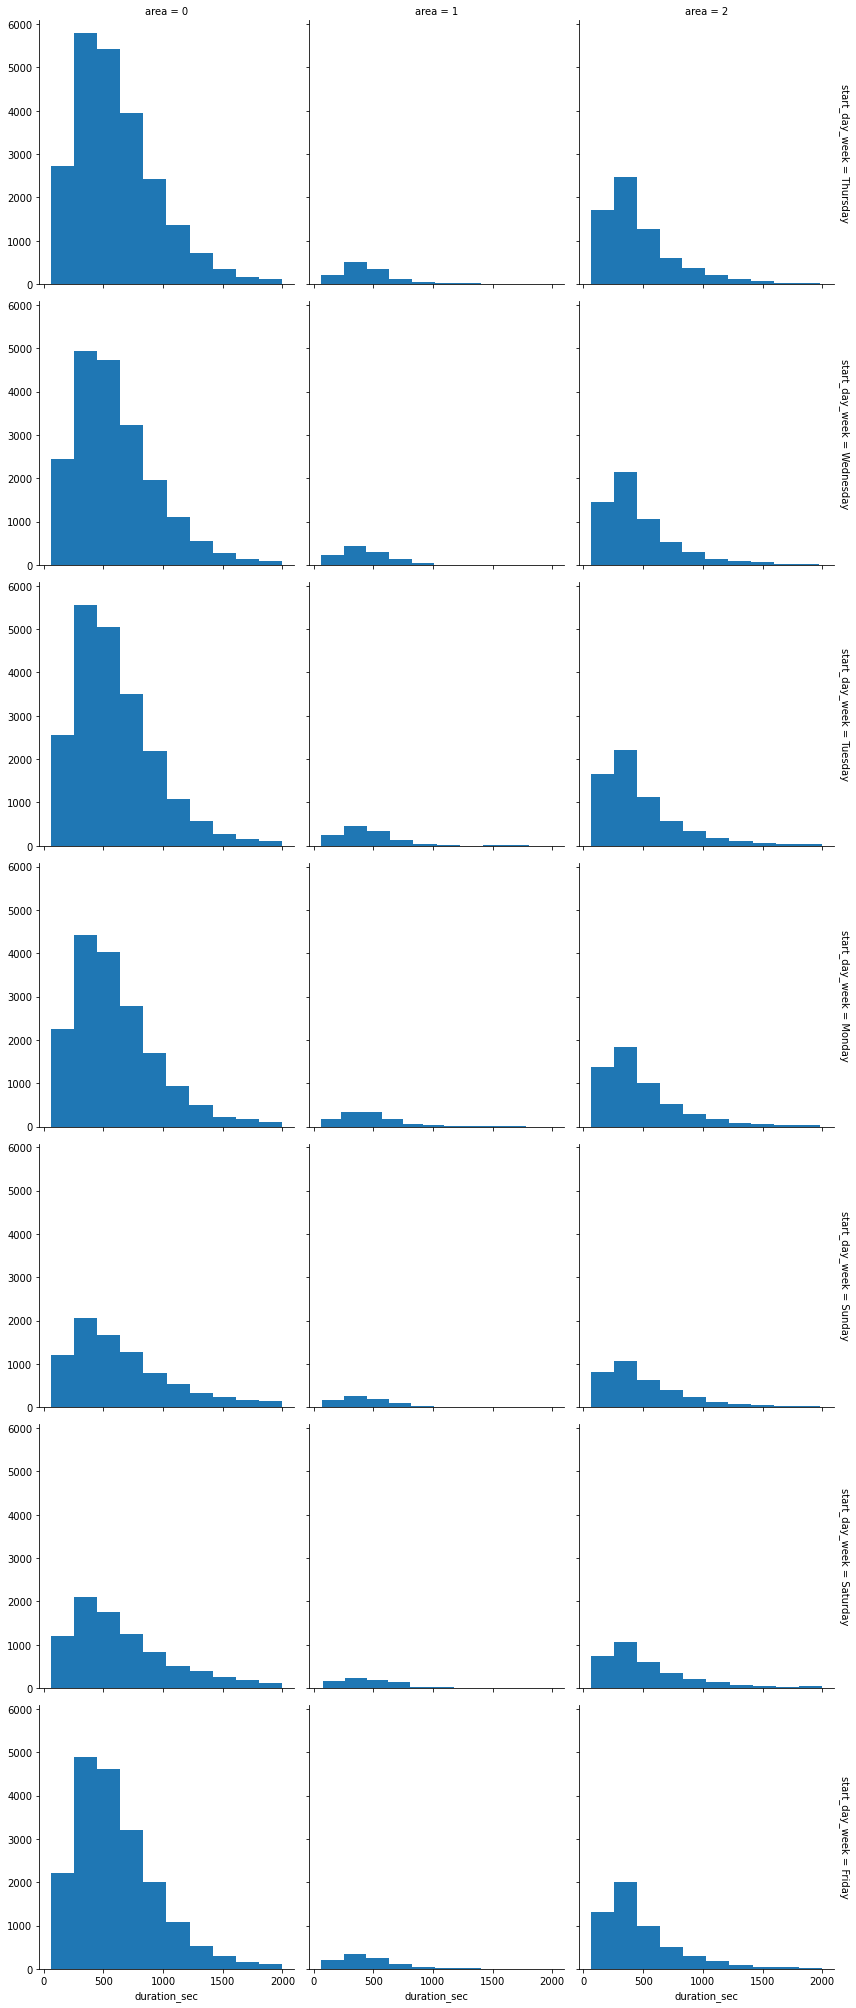

In [ ]:
g = sns.FacetGrid(data = data3, col = 'area',row='start_day_week', margin_titles = True,size = 4)


g.map(plt.hist,  'duration_sec')


area 0 cyclists are a lot more the two areas

area 1 cyclists has the least number of people  


you can notice that from high ddensity of the first column 

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


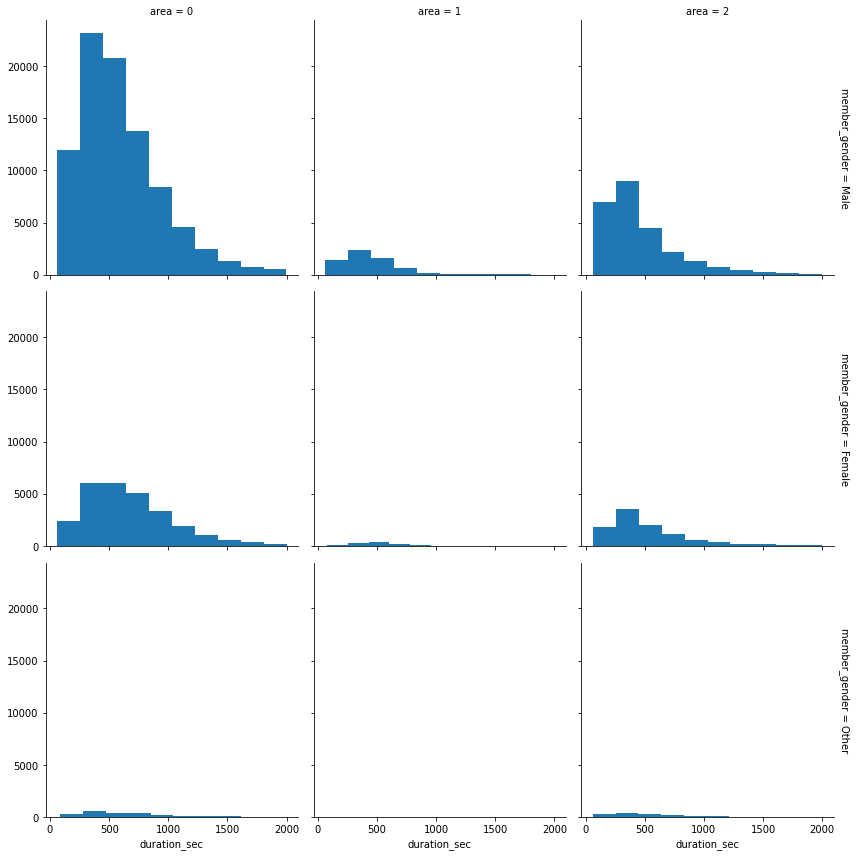

In [ ]:
g = sns.FacetGrid(data = data3, col = 'area',row='member_gender', margin_titles = True,size = 4)


g.map(plt.hist,  'duration_sec')
